# 2_Logistic_Regression

In [105]:
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import matplotlib.pyplot as plt # Needs for Ploting
%matplotlib inline
torch.manual_seed(888)    # reproducible

## Prepare Data

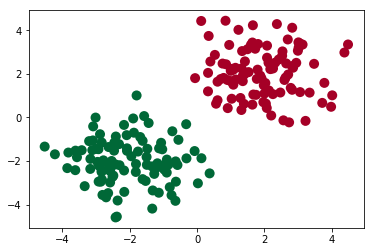

Variable containing:
 1.7961  2.1912  0.0000
 2.4245  2.6576  0.0000
 1.3897  0.6232  0.0000
 0.5275  2.8680  0.0000
 1.7244  3.1506  0.0000
 2.9929  3.0592  0.0000
 2.2509  1.0690  0.0000
 1.6421  3.4357  0.0000
 2.8167  2.3534  0.0000
 2.6453  2.4772  0.0000
 3.7169  0.6671  0.0000
 1.3574  1.9112  0.0000
 3.0554  3.3875  0.0000
 1.7727  1.7680  0.0000
 0.6064  0.7876  0.0000
 0.7563  2.4706  0.0000
 1.3151  0.3415  0.0000
 2.4713  1.1423  0.0000
 0.3231  1.1971  0.0000
 2.0417  0.6321  0.0000
 4.3750  2.9774  0.0000
 3.0583  1.1625  0.0000
 1.4195  2.5707  0.0000
 1.0505  2.2280  0.0000
 2.1739  2.2159  0.0000
 2.3696  4.2819  0.0000
 0.9955  1.6663  0.0000
 1.5283  2.0784  0.0000
 0.9530  3.3249  0.0000
 2.7812  1.3545  0.0000
 1.1483  1.7398  0.0000
 2.0265  1.5772  0.0000
 1.4074  1.9837  0.0000
 0.5627  0.6293  0.0000
 1.6565  4.2270  0.0000
 3.0158  3.2016  0.0000
 0.9989  2.1388  0.0000
 1.2271  4.0177  0.0000
 2.0762  3.2924  0.0000
 2.2006  0.0879  0.0000
 0.3427  3.7369  0.

In [106]:
# make fake data
n_data = torch.ones(100, 2)

x0 = torch.normal(2*n_data, 1)        # class0 x data (tensor), shape=(100, 2)   mu=(2,2), var =1
y0 = torch.zeros(100,1)               # class0 y data (tensor), shape=(100, 1)

x1 = torch.normal(-2*n_data, 1)       # class1 x data (tensor), shape=(100, 2)   mu=(-2,2), var=1
y1 = torch.ones(100,1)                # class1 y data (tensor), shape=(100, 1)

x = torch.cat((x0, x1)).type(torch.FloatTensor)    # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1)).type(torch.FloatTensor)    # shape (200, 1) FloatTensor = 32-bit integer

# torch can only train on Variable, so convert them to Variable
x,y = Variable(x),Variable(y)

plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=y.squeeze().numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

torch.cat((x, y),dim=1)

### Define Logistic Regression Model

In [107]:
# Hypothesis using sigmoid and linear model
linear  =  nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model   = nn.Sequential(linear, sigmoid)

In [108]:
model.state_dict()

OrderedDict([('0.weight', 
              -0.6762  0.3051
              [torch.FloatTensor of size 1x2]), ('0.bias', 
              -0.7006
              [torch.FloatTensor of size 1])])

### Define Optimizer and Cost Function

In [109]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
cost_fn = nn.BCELoss() #Binary Cross Entropy Costfunction
#cost_fn = -(y * torch.log(prob) + (1 - y)* torch.log(1 - prob) ).mean() 

### Train 

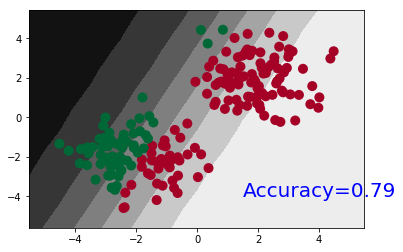

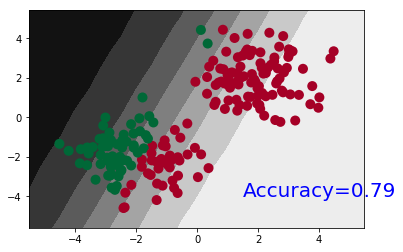

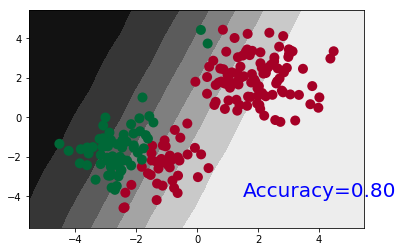

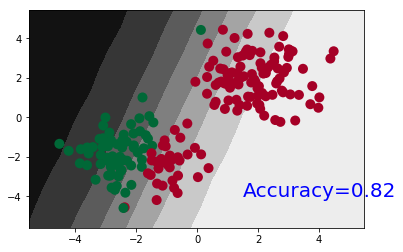

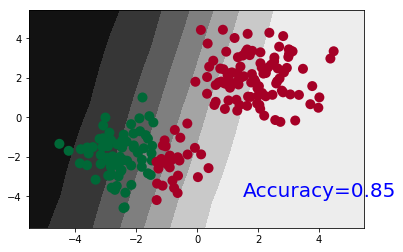

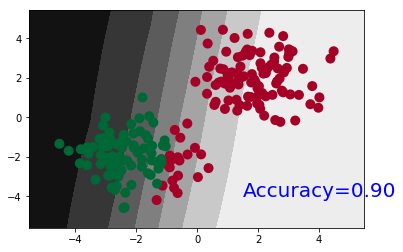

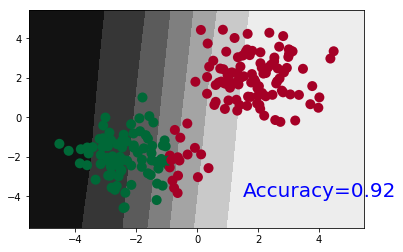

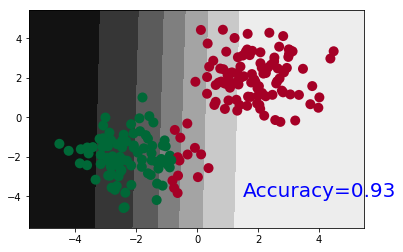

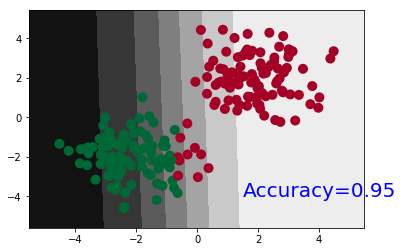

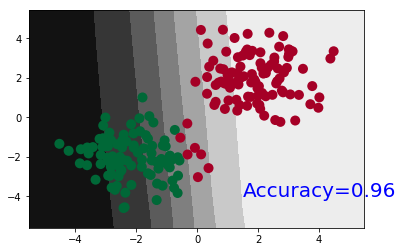

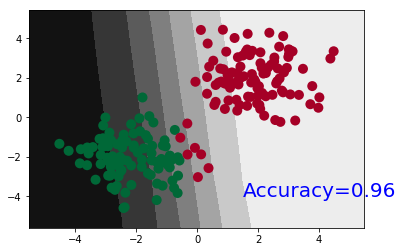

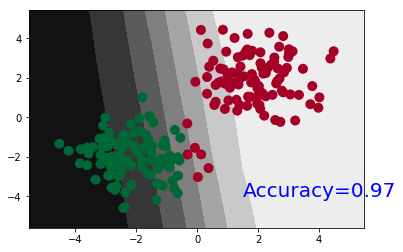

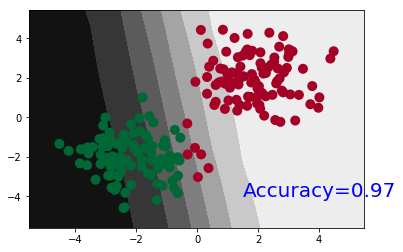

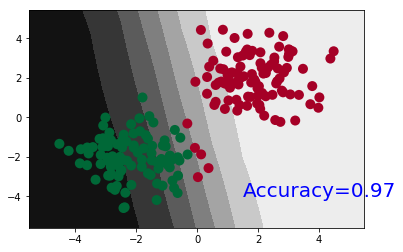

In [110]:
plt.ion()   # something about plotting

for t in range(120):   

    prob = model(x)                 # input x and predict based on x
    cost = cost_fn(prob, y)
    
    optimizer.zero_grad()         # clear gradients for next train
    cost.backward()               # compute gradients
    optimizer.step()              # apply gradients
    
    # ----------------------------------------------------------------------#
    # Ploting
    if t % 10 == 0 or t in [3, 6]:
        # plot and show learning process
        plt.cla()
        prediction = prob.gt(0.5)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.squeeze(1).numpy()
        
        # Draw massgrid
        x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
        y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min.data.numpy(), x_max.data.numpy(), 1),
                             np.arange(y_min.data.numpy(), y_max.data.numpy(), 1))

        # here "model" is your model's prediction (classification) function
        Z = model(Variable(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()])).float())

        # Put the result into a color plot
        Z = Z.view(xx.shape)
        plt.contourf(xx, yy, Z.data.numpy(), cmap=plt.cm.binary)
        #plt.axis('off')

        # Plot also the training points
        #plt.scatter(x[:, 0].data.numpy(), x[:, 1].data.numpy(), c=pred_y, cmap='RdYlGn')      
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')

        accuracy = sum(pred_y == target_y)/200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'Blue'})
        plt.show()
        plt.pause(0.1)
        
plt.ioff()

In [114]:
model.state_dict()

OrderedDict([('0.weight', 
              -1.0190 -0.1951
              [torch.FloatTensor of size 1x2]), ('0.bias', 
              -0.6037
              [torch.FloatTensor of size 1])])

### Prediction (Test)

In [123]:
a_sample = torch.ones(1, 2)
x_new = Variable(torch.normal(2*a_sample, 1))        # sample x_new ~ Gaussian( mu=(2,2), var=diag(1,1))  (class0) 

In [124]:
y_pred = model(x_new)

In [125]:
y_pred                                               # probability of class1

Variable containing:
1.00000e-02 *
  4.9499
[torch.FloatTensor of size 1x1]

In [126]:
1-y_pred                                             # probability of class0

Variable containing:
 0.9505
[torch.FloatTensor of size 1x1]

### Draw Sample from Logistic Regression ??
We can't draw sample from logistic regresion 
Because it is a discriminative model..